# Bike Sharing Data Set
## Description

Dataset describing student performance in secondary education high school, with the target of predicting their final grade. 

The column attributes are as follows:

| Id | Attribute |Domain |
| -   | ----------- |----------- |
| 1 | instant: record index | numeric |
| 2 | dteday | date |
| 3 | season : season | 1:springer, 2:summer, 3:fall, 4:winter |
| 4 | yr : year | 0: 2011, 1:2012 |
| 5 | mnth : month | 1 to 12 |
| 6 | hr : hour | 0 to 23 |
| 7 | holiday |  1: holiday, 0: not a holiday |
| 8 | weekday | 0 to 6 |
| 9 | workingday : if day is neither weekend nor holiday is 1, otherwise is 0. | binary |
| 10 | weathersit :  | - 1: Clear, Few clouds, Partly cloudy, Partly cloudy, - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| 11 | temp : Normalized temperature in Celsius. The values are divided to 41 (max) | numeric |
| 12 | atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max) | numeric |
| 13 | hum: Normalized humidity. The values are divided to 100 (max) | numeric |
| 14 | windspeed: Normalized wind speed. The values are divided to 67 (max) | numeric |
| 15 | casual: count of casual users | numeric |
| 16 | registered: count of registered users | numeric |
| 17 | cnt: count of total rental bikes including both casual and registered | numeric |

## Importing and processing dataset

In [1]:
import pandas as pd

column_names = ['instant',
                'season',
                'yr',
                'mnth',
                'hr',
                'holiday',
                'weekday',
                'workingday',
                'weathersit',
                'temp',
                'atemp',
                'hum',
                'windspeed',
                'casual',
                'registered',
                'cnt']

features = column_names[:-3]
targets = column_names[-1:]

with open("../../datasets/regression/hour.csv", "r") as dataset_file:
    raw_data = pd.read_csv('../../datasets/regression/hour.csv', header = 0)

raw_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Preparing the Dataset

In [2]:
prepared_data = raw_data.fillna(-1)

The following block prints the shape and column datatypes of the processed dataset.

In [3]:
print(prepared_data.shape)
print(prepared_data.dtypes)

(17379, 17)
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


## Preprocessing the Dataset

In [4]:
from sklearn.model_selection import train_test_split

# prepared_data = prepared_data.drop(columns='dteday')

X_full = prepared_data[features].copy()
y_full = prepared_data[targets].copy().to_numpy().flatten()

# Split the dataset into two parts, one part training, the other, testing and valating.
X_train, X_test_and_val, y_train, y_test_and_val = train_test_split(X_full, y_full, 
                                                        train_size=0.6,
                                                        random_state=0)
# Split the second part from the previous split into two parts, one part testing, the other, valating.
X_test, X_val, y_test, y_val = train_test_split(X_test_and_val, y_test_and_val, 
                                                        train_size=0.5,
                                                        random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit scaler to data then transform it.
X_train_scaled = scaler.fit_transform(X_train)

# Apply same transformation to test and validation data without fitting.
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

## Training on Multiple Regressors

In [6]:
#Manage imports 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from utilities import train_estimators, plot_estimator_scores

### Linear Regression

In [7]:
LinearRegressionEstimator = LinearRegression().fit(X_train_scaled, y_train)
LR_train_score = LinearRegressionEstimator.score(X_train_scaled, y_train)
LR_test_score = LinearRegressionEstimator.score(X_test_scaled, y_test)
LR_val_score = LinearRegressionEstimator.score(X_val_scaled, y_val)
print(f'{LR_train_score=}, {LR_test_score=}, {LR_val_score=}')

LR_train_score=0.3863139245437549, LR_test_score=0.38715197532478607, LR_val_score=0.3962729789581403


### SVM Regression

Training SVR(C=0.01, gamma=0.0001, max_iter=10000)...
Training SVR(C=0.1, gamma=0.0001, max_iter=10000)...
Training SVR(C=1.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=10.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=100.0, gamma=0.0001, max_iter=10000)...
Training SVR(C=1000.0, gamma=0.0001, max_iter=10000)...


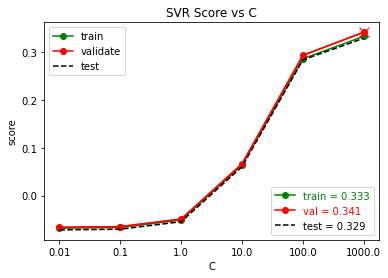

In [8]:
adjusted_parameter = 'C'
adjusted_parameter_values = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

SVMEstimators = train_estimators(X_train_scaled, y_train,
                                    SVR,
                                    adjusted_parameter, adjusted_parameter_values,
                                    gamma=0.0001,
                                    max_iter=10000)
plot_estimator_scores(SVMEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### Decision Tree Regression

Training DecisionTreeRegressor(max_depth=1, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=5, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=10, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=20, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=50, splitter='random', random_state=0)...
Training DecisionTreeRegressor(max_depth=100, splitter='random', random_state=0)...


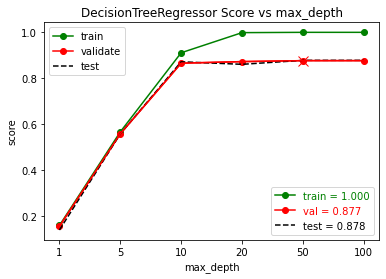

In [9]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

DecisionTreeEstimators = train_estimators(X_train_scaled, y_train,
                                            DecisionTreeRegressor,
                                            adjusted_parameter, adjusted_parameter_values,
                                            splitter='random',
                                            random_state=0)
plot_estimator_scores(DecisionTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### RandomForest Regressor

Training RandomForestRegressor(max_depth=1, random_state=0)...
Training RandomForestRegressor(max_depth=5, random_state=0)...
Training RandomForestRegressor(max_depth=10, random_state=0)...
Training RandomForestRegressor(max_depth=20, random_state=0)...
Training RandomForestRegressor(max_depth=50, random_state=0)...
Training RandomForestRegressor(max_depth=100, random_state=0)...


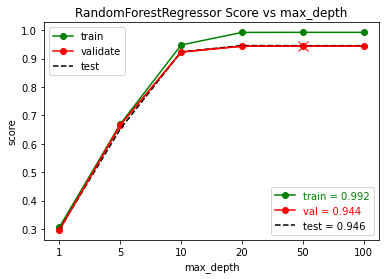

In [10]:
adjusted_parameter = 'max_depth'
adjusted_parameter_values = [1, 5, 10, 20, 50, 100]

RandomTreeEstimators = train_estimators(X_train_scaled, y_train,
                                        RandomForestRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(RandomTreeEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### K-nearest Regressor

Training KNeighborsRegressor(weights=uniform, n_neighbors=2)...
Training KNeighborsRegressor(weights=distance, n_neighbors=2)...


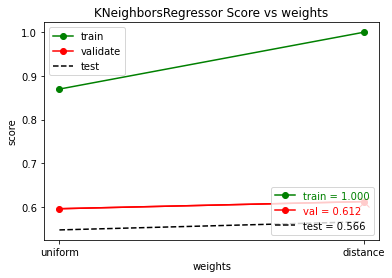

In [11]:
adjusted_parameter = 'weights'
adjusted_parameter_values = ['uniform','distance']

KNearestEstimators = train_estimators(X_train_scaled, y_train,
                                        KNeighborsRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

Training KNeighborsRegressor(algorithm=auto, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=ball_tree, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=kd_tree, n_neighbors=2)...
Training KNeighborsRegressor(algorithm=brute, n_neighbors=2)...


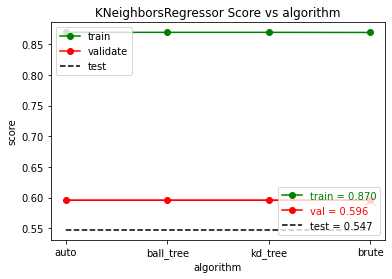

In [12]:
adjusted_parameter = 'algorithm'
adjusted_parameter_values = ['auto', 'ball_tree', 'kd_tree','brute']

KNearestEstimators = train_estimators(X_train_scaled, y_train,
                                        KNeighborsRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        n_neighbors=2)
plot_estimator_scores(KNearestEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### Ada Boost Regression

Training AdaBoostRegressor(n_estimators=10, random_state=0)...
Training AdaBoostRegressor(n_estimators=50, random_state=0)...
Training AdaBoostRegressor(n_estimators=100, random_state=0)...
Training AdaBoostRegressor(n_estimators=500, random_state=0)...
Training AdaBoostRegressor(n_estimators=1000, random_state=0)...
Training AdaBoostRegressor(n_estimators=5000, random_state=0)...


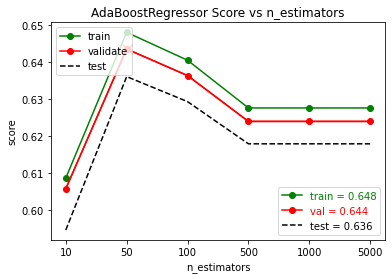

In [13]:
adjusted_parameter = 'n_estimators'
adjusted_parameter_values = [10, 50, 100, 500, 1000, 5000]

AdaBoostEstimators = train_estimators(X_train_scaled, y_train,
                                        AdaBoostRegressor,
                                        adjusted_parameter, adjusted_parameter_values,
                                        random_state=0)
plot_estimator_scores(AdaBoostEstimators,
                        adjusted_parameter, adjusted_parameter_values,
                        X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, y_val)

### Gaussian Process Regressor

In [14]:
gaussian_nb = GaussianProcessRegressor()
NaiveBayesEstimator = gaussian_nb.fit(X_train_scaled, y_train)
gaussian_nb_train_score = NaiveBayesEstimator.score(X_train_scaled, y_train)
gaussian_nb_test_score =  NaiveBayesEstimator.score(X_test_scaled, y_test)
gaussian_nb_val_score =  NaiveBayesEstimator.score(X_val_scaled, y_val)
print(f'{gaussian_nb_train_score=}, {gaussian_nb_val_score=}, {gaussian_nb_test_score=}')

gaussian_nb_train_score=0.9999999998090227, gaussian_nb_val_score=-1.3014975024117672, gaussian_nb_test_score=-9.978520224440127


### Neural Network Classification Through a Multi-Layer Perceptron

In [15]:
mlp = MLPRegressor(hidden_layer_sizes=(), activation='relu',
                                            batch_size=100, max_iter=5000, learning_rate_init=0.01,
                                            momentum=0.4, random_state=0, verbose=False).fit(X_train_scaled, y_train)

print(f'Training Score: {mlp.score(X_train_scaled, y_train)}')
print(f'Testing Score: {mlp.score(X_test_scaled, y_test)}')
print(f'Validation Score: {mlp.score(X_val_scaled, y_val)}')

mlp = MLPRegressor(hidden_layer_sizes=(32), activation='relu',
                                            batch_size=100, max_iter=5000, learning_rate_init=0.001,
                                            momentum=0.4, random_state=0, verbose=False).fit(X_train_scaled, y_train)

print(f'Training Score: {mlp.score(X_train_scaled, y_train)}')
print(f'Testing Score: {mlp.score(X_test_scaled, y_test)}')
print(f'Validation Score: {mlp.score(X_val_scaled, y_val)}')

Training Score: 0.38598600922482695
Testing Score: 0.38706674354810666
Validation Score: 0.3972366745260457
Training Score: 0.9007155778080197
Testing Score: 0.8777597957964312
Validation Score: 0.8861663600145865
